# Task 3

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier

In [7]:
tweets_df = pd.read_csv("data/clean_processed_tweet.csv")

In [8]:
tweets_df.head()

,Unnamed: 0,created_at,source,Original_Text,full_text,sentiment,polarity,subjectivity,lang,favorite_count,retweet_count,possibly_sensitive,hashtags,user_mentions,place
0,0,2022-08-07 22:31:20+00:00,['source'],RT @i_ameztoy: Extra random image (I):\n\nLets...,rt iameztoy extra random image lets focus one ...,0,-1.250000e-01,0.190625,en,0,2,NaN,City,i_ameztoy,NaN
1,1,2022-08-07 22:31:16+00:00,['source'],RT @IndoPac_Info: #China's media explains the ...,rt indopacinfo chinas media explains military ...,0,-1.000000e-01,0.100000,en,0,201,NaN,"China, Taiwan",IndoPac_Info,NaN
2,2,2022-08-07 22:31:07+00:00,['source'],"China even cut off communication, they don't a...",china even cut communication dont anwer phonec...,-1,0.000000e+00,0.000000,en,0,0,NaN,XiJinping,ZelenskyyUa,Netherlands
3,3,2022-08-07 22:31:06+00:00,['source'],"Putin to #XiJinping : I told you my friend, Ta...",putin xijinping told friend taiwan vassal stat...,1,1.000000e-01,0.350000,en,0,0,NaN,XiJinping,NaN,Netherlands
4,4,2022-08-07 22:31:04+00:00,['source'],"RT @ChinaUncensored: I’m sorry, I thought Taiw...",rt chinauncensored i’m sorry thought taiwan in...,0,-6.938894e-18,0.556250,en,0,381,NaN,NaN,ChinaUncensored,"Ayent, Schweiz"


In [9]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          999 non-null    int64  
 1   created_at          999 non-null    object 
 2   source              999 non-null    object 
 3   Original_Text       999 non-null    object 
 4   full_text           999 non-null    object 
 5   sentiment           999 non-null    int64  
 6   polarity            999 non-null    float64
 7   subjectivity        999 non-null    float64
 8   lang                999 non-null    object 
 9   favorite_count      999 non-null    int64  
 10  retweet_count       999 non-null    int64  
 11  possibly_sensitive  246 non-null    object 
 12  hashtags            877 non-null    object 
 13  user_mentions       875 non-null    object 
 14  place               568 non-null    object 
dtypes: float64(2), int64(4), object(9)
memory usage: 117.2+ K

In [10]:
tweets_df.isna()

,Unnamed: 0,created_at,source,Original_Text,full_text,sentiment,polarity,subjectivity,lang,favorite_count,retweet_count,possibly_sensitive,hashtags,user_mentions,place
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
995,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True
996,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [11]:
tweets_df.isna()

,Unnamed: 0,created_at,source,Original_Text,full_text,sentiment,polarity,subjectivity,lang,favorite_count,retweet_count,possibly_sensitive,hashtags,user_mentions,place
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
995,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True
996,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [12]:
tweets_df.shape

(999, 15)

In [13]:
tweets_df.columns

Index(['Unnamed: 0', 'created_at', 'source', 'Original_Text', 'full_text',
       'sentiment', 'polarity', 'subjectivity', 'lang', 'favorite_count',
       'retweet_count', 'possibly_sensitive', 'hashtags', 'user_mentions',
       'place'],
      dtype='object')

In [14]:
tweets_df.dropna()

,Unnamed: 0,created_at,source,Original_Text,full_text,sentiment,polarity,subjectivity,lang,favorite_count,retweet_count,possibly_sensitive,hashtags,user_mentions,place
5,5,2022-08-07 22:31:02+00:00,['source'],RT @benedictrogers: We must not let this happe...,rt benedictrogers must let happen must ready m...,1,0.200,0.500,en,0,36,False,Taiwan,benedictrogers,"Melbourne, Victoria"
36,36,2022-08-07 22:26:25+00:00,['source'],RT @ChinaInfo777: #PinkFloyd Roger Waters tell...,rt chinainfo777 pinkfloyd roger waters tells t...,-1,0.000,0.000,en,0,5,False,"PinkFloyd, Taiwan, China",ChinaInfo777,"Florida, USA"
39,39,2022-08-07 22:25:37+00:00,['source'],"RT @WilliamYang120: ""For too long, #Taiwan has...",rt williamyang120 long taiwan bullied marginal...,0,-0.025,0.200,en,0,84,False,Taiwan,WilliamYang120,Hong Kong
43,43,2022-08-07 22:25:05+00:00,['source'],RT @odisseoisback: #Corfu #Greece🇬🇷\n#Summer #...,rt odisseoisback corfu greece summer beaches t...,-1,0.000,0.000,en,0,2,False,"Corfu, Greece, Summer, Beaches, Travel, Excurs...",odisseoisback,Paris
48,48,2022-08-07 22:24:44+00:00,['source'],RT @benedictrogers: We must not let this happe...,rt benedictrogers must let happen must ready m...,1,0.200,0.500,en,0,36,False,Taiwan,benedictrogers,Hong Kong
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,960,2022-08-07 20:38:33+00:00,['source'],RT @Lavi4441: I think no caption need. #ChinaT...,rt lavi4441 think caption need chinataiwancris...,-1,0.000,0.000,en,0,1249,False,"ChinaTaiwanCrisis, Taiwan, China",Lavi4441,Hennessy in a TeaCup
963,963,2022-08-07 20:38:13+00:00,['source'],RT @Fallen_x_King: True that\n#China #Taiwan #...,rt fallenxking true china taiwan wwiii httpstc...,1,0.350,0.650,en,0,2303,False,"China, Taiwan, WWIII",Fallen_x_King,Hennessy in a TeaCup
965,965,2022-08-07 20:37:53+00:00,['source'],RT @AoxiPRNew: Taiwan now is an independent co...,rt aoxiprnew taiwan independent country pelosi...,-1,0.000,0.125,en,0,10,False,"pelosivisittotaiwan, ccplies, chinesecommunist...",AoxiPRNew,村里
967,967,2022-08-07 20:37:42+00:00,['source'],It seems that @SpeakerPelosi had a very succes...,seems speakerpelosi successful trip taiwan htt...,1,1.000,1.000,en,0,0,False,Taiwan,SpeakerPelosi,"South East, England"


In [15]:
tweets_df["source"] = tweets_df["source"].str.replace(r"(\s*\<.*?\>\s*)", " ", regex=True).str.strip()

In [16]:
tweets_df

,Unnamed: 0,created_at,source,Original_Text,full_text,sentiment,polarity,subjectivity,lang,favorite_count,retweet_count,possibly_sensitive,hashtags,user_mentions,place
0,0,2022-08-07 22:31:20+00:00,['source'],RT @i_ameztoy: Extra random image (I):\n\nLets...,rt iameztoy extra random image lets focus one ...,0,-1.250000e-01,0.190625,en,0,2,NaN,City,i_ameztoy,NaN
1,1,2022-08-07 22:31:16+00:00,['source'],RT @IndoPac_Info: #China's media explains the ...,rt indopacinfo chinas media explains military ...,0,-1.000000e-01,0.100000,en,0,201,NaN,"China, Taiwan",IndoPac_Info,NaN
2,2,2022-08-07 22:31:07+00:00,['source'],"China even cut off communication, they don't a...",china even cut communication dont anwer phonec...,-1,0.000000e+00,0.000000,en,0,0,NaN,XiJinping,ZelenskyyUa,Netherlands
3,3,2022-08-07 22:31:06+00:00,['source'],"Putin to #XiJinping : I told you my friend, Ta...",putin xijinping told friend taiwan vassal stat...,1,1.000000e-01,0.350000,en,0,0,NaN,XiJinping,NaN,Netherlands
4,4,2022-08-07 22:31:04+00:00,['source'],"RT @ChinaUncensored: I’m sorry, I thought Taiw...",rt chinauncensored i’m sorry thought taiwan in...,0,-6.938894e-18,0.556250,en,0,381,NaN,NaN,ChinaUncensored,"Ayent, Schweiz"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,994,2022-08-07 20:34:08+00:00,['source'],RT @RobertQ84643496: POLYMATECH INVESTS US$ 1 ...,rt robertq84643496 polymatech invests us 1 bil...,-1,0.000000e+00,0.000000,en,0,2,False,semiconductor,RobertQ84643496,Virginia
995,995,2022-08-07 20:34:05+00:00,['source'],"RT @SpokespersonCHN: ""#Taiwan is part of China...",rt spokespersonchn taiwan part china thats abs...,1,1.333333e-01,0.433333,en,0,669,NaN,Taiwan,SpokespersonCHN,NaN
996,996,2022-08-07 20:34:02+00:00,['source'],"RT @IndoPac_Info: From Chinese media:\n\n""#PLA...",rt indopacinfo chinese media pla eastern theat...,0,-5.000000e-02,0.050000,en,0,60,NaN,"PLA, Taiwan",IndoPac_Info,"奈良県 奈良市 Nara, JAPAN"
997,997,2022-08-07 20:33:52+00:00,['source'],RT @IndoPac_Info: 1) A Lithuanian delegation h...,rt indopacinfo 1 lithuanian delegation headed ...,-1,0.000000e+00,0.000000,en,0,66,NaN,Taiwan,IndoPac_Info,"奈良県 奈良市 Nara, JAPAN"


/var/folders/03/42qnwtg96wz2kqy15462lr9c0000gn/T/ipykernel_7111/2636654801.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(labels, rotation=90)
/var/folders/03/42qnwtg96wz2kqy15462lr9c0000gn/T/ipykernel_7111/2636654801.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


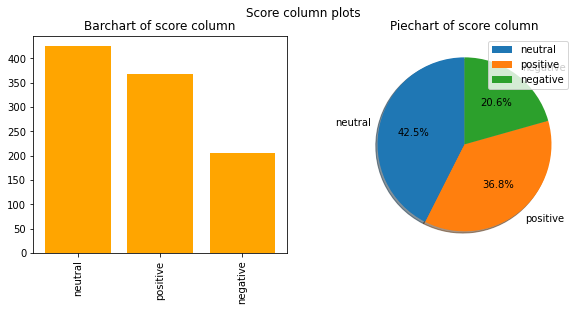

In [17]:
labels = ['neutral', 'positive', 'negative']

neutral_count =  len(tweets_df[tweets_df['polarity'] > 0])
positive_count = len(tweets_df[tweets_df['polarity'] == 0])
negative_count = len(tweets_df[tweets_df['polarity'] <0])
sizes = [neutral_count, positive_count, negative_count]
# Create a figure for 2 subplots (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize = (10,4))

# Create a bar plot of score column
ax[0].bar(x=labels, height=[neutral_count, positive_count, negative_count], color='orange')
ax[0].set_title('Barchart of score column')
ax[0].set_xticklabels(labels, rotation=90)

# Create a pie chart of score column based on neutral, positive or negative

ax[1].pie(sizes,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax[1].set_title('Piechart of score column')
ax[1].legend(labels)

# Add a title to the Figure
fig.suptitle('Score column plots')

# Show the figure
fig.show()